<a href="https://colab.research.google.com/github/mehedihasan-cse/ML-Projects/blob/main/Hate_Speech_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import numpy as np  #To work with multi-dimentional array and matrix
import pandas as pd  #Data Manipulation, Data strcutre
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns
%matplotlib inline


In [139]:
df = pd.read_csv("/content/bengali_hate_v2.0.csv")

In [140]:
df.head()

,text,label,target
0,বৌদির দুধ দেকে তো আমার ই চোখ ঠিক ছিলো না - পোল...,Personal,0
1,এই সরকার কে যারা নির্লজ্জের মত সাপোর্ট দিয়েছে ...,Political,1
2,পিলখানা হত্যাকান্ড বাংলাদেশের প্রতিরক্ষা ব্যবস...,Geopolitical,3
3,ভারতের অর্থনীতি নিয়ে আপনাদের ভাবতে হবে না। ভা...,Geopolitical,3
4,খানকির পুলা মালায়নদের মেরে সাফা করে ফেল,Personal,0


In [141]:
df.columns.values

array(['text', 'label', 'target'], dtype=object)

In [142]:
df.isna().sum()

text      0
label     0
target    0
dtype: int64

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5698 entries, 0 to 5697
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5698 non-null   object
 1   label   5698 non-null   object
 2   target  5698 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 133.7+ KB


In [144]:
df.value_counts()

text                                                                                                                                      label         target
 অন্ন কেহু না সব রেন্ডিয়ার দাদা বাবুরা। চিন্তার কারন নাই।                                                                                 Geopolitical  3         1
ভাই আপনি তাকে কেন বলছেন না যে তুমি উর্দুতে কথা বল আমি যেভাবে ধর্ম গ্রন্থ থেকে রেফারেন্স দিয়ে কথা বলতেছি তুমি রেফারেন্সে কথা বল এটা বলুন  Religious     2         1
ভাই তোর সাফল্যের রহস্যটা কি? আমি পর্ণ ওয়েবসাইট ব্যান করি নাই                                                                              Personal      0         1
ভাই তোর মতো মা চোদা আর দেখিনি                                                                                                             Personal      0         1
ভাই তোমারে তো চুরের মত লাগে.                                                                                                              Personal      0         1
                     

In [160]:
pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.2 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=5ab74fa8ce96a9dfaa266483866895932ea38e9f33f4554166df2f6e15a89d3a
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: sentencepiece
    Found existing installation: sentencepiece 0.1.99
    Uninstalling sentencepiece-0.1.99:
      Successfully uninstalled sentencepiece-0.1.99
  Attempting 

In [159]:
from wordcloud import WordCloud
from bnlp import NLTKTokenizer

SyntaxError: invalid syntax (<ipython-input-159-fad43d56c126>, line 2)

In [146]:
category_column = 'text'
text_data = ' '.join(df[category_column].dropna().astype(str))


In [147]:
bengali_font_path = '/content/SutonnyMJ Regular.ttf'


In [150]:
print(text_data[:500])

বৌদির দুধ দেকে তো আমার ই চোখ ঠিক ছিলো না - পোলাপান এর চোখ কিভাবে ঠিক থাকবে! এই সরকার কে যারা নির্লজ্জের মত সাপোর্ট দিয়েছে বছরের পর বছর, তাদের আরো এমন রাস্তায় রাস্তায় কাঁদতে হবে  পিলখানা হত্যাকান্ড বাংলাদেশের প্রতিরক্ষা ব্যবস্থা ধ্বংসের জন্য ভারতের প্রত্যক্ষ সহযোগিতায় এই হত্যাকা- ঘটানো হয়েছিল  ভারতের অর্থনীতি নিয়ে আপনাদের ভাবতে হবে না। ভারতের অর্থনীতি নিয়ে ভারত সরকার আছে। আদার বেপারী জাহাজের খোঁজ নিয়ে লাভ নাই। খানকির পুলা মালায়নদের মেরে সাফা করে ফেল শুয়োর এর বাচ্চা দুরগারে চুদি কুত্তা দিয়া ক


In [154]:
wordcloud = WordCloud(font_path=bengali_font_path, width=800, height=400, background_color='white').generate(text_data)


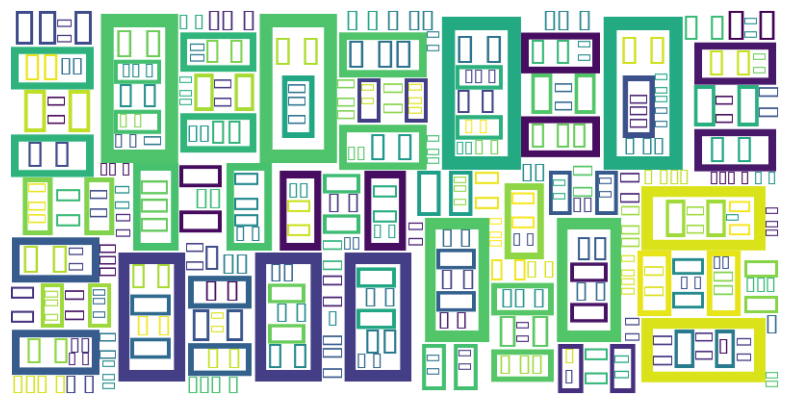

In [152]:
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
